In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/state-of-data-brazil-2023/State_of_data_BR_2023_Kaggle - df_survey_2023.csv


In [3]:
df = pd.read_csv('/kaggle/input/state-of-data-brazil-2023/State_of_data_BR_2023_Kaggle - df_survey_2023.csv')
pd.set_option('display.max_columns', 50)

In [4]:
df_backup = df.copy()

In [5]:
# df = df_backup.copy()

In [6]:
def verifica_colunas(df, colunas_por_linha=8, fila = False):
    colunas = df.columns
    if fila:
        for columns in df.columns:
            print(columns)
    else:
        for i in range(0, len(colunas), colunas_por_linha):
            print('\t\t'.join(colunas[i:i+colunas_por_linha]))

In [7]:
dict_cols= {}

for column in df.columns:
        column = column.replace("('", '')
        column = column.replace("', '", '/*/')
        column = column.replace("')", '')

        nome = column.split('/*/')[0].strip()
        desc = column.split('/*/')[1]

        dict_cols[nome] = desc

df.columns = dict_cols.keys()

df.columns

Index(['P0', 'P1_a', 'P1_a_1', 'P1_b', 'P1_c', 'P1_d', 'P1_e', 'P1_e_1',
       'P1_e_2', 'P1_e_3',
       ...
       'P8_d_3', 'P8_d_4', 'P8_d_5', 'P8_d_6', 'P8_d_7', 'P8_d_8', 'P8_d_9',
       'P8_d_10', 'P8_d_11', 'P8_d_12'],
      dtype='object', length=399)

In [8]:
dict_cols['P8_d_4']

'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).'

In [9]:
verifica_colunas(df)

P0		P1_a		P1_a_1		P1_b		P1_c		P1_d		P1_e		P1_e_1
P1_e_2		P1_e_3		P1_e_4		P1_f		P1_f_1		P1_f_2		P1_f_3		P1_f_4
P1_f_5		P1_f_6		P1_f_7		P1_f_8		P1_f_9		P1_g		P1_i		P1_i_1
P1_i_2		P1_j		P1_k		P1_l		P1_m		P2_a		P2_b		P2_c
P2_d		P2_e		P2_f		P2_g		P2_h		P2_i		P2_j		P2_k
P2_l		P2_l_1		P2_l_2		P2_l_3		P2_l_4		P2_l_5		P2_l_6		P2_l_7
P2_m		P2_n		P2_o		P2_o_1		P2_o_2		P2_o_3		P2_o_4		P2_o_5
P2_o_6		P2_o_7		P2_o_8		P2_o_9		P2_o_10		P2_q		P2_r		P2_s
P2_t		P3_a		P3_b		P3_b_1		P3_b_2		P3_b_3		P3_b_4		P3_b_5
P3_b_6		P3_b_7		P3_b_8		P3_b_9		P3_c		P3_c_1		P3_c_2		P3_c_3
P3_c_4		P3_c_5		P3_c_6		P3_c_7		P3_c_8		P3_c_9		P3_c_10		P3_c_11
P3_d		P3_d_1		P3_d_2		P3_d_3		P3_d_4		P3_d_5		P3_d_6		P3_d_7
P3_d_8		P3_d_9		P3_d_10		P3_d_11		P3_d_12		P3_d_13		P3_d_14		P3_e
P3_f		P3_f_1		P3_f_2		P3_f_3		P3_f_4		P3_f_5		P3_f_6		P3_f_7
P3_f_8		P3_g		P3_g_1		P3_g_2		P3_g_3		P3_g_4		P3_g_5		P3_g_6
P3_g_7		P3_g_8		P3_g_9		P4_a		P4_a_1		P4_b		P4_b_1		P4_b_2
P4_b_3		P4_b_4		P4_b_5		P4_b_6		P4_b_7		P4_b_8		P4_c		P4_c_1
P4_c_2	

### Importações

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Para começar as análises, defini uma série de perguntas:

Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar por faixa de idade e faixa salarialQuais os principais critérios que você leva em consideração no momento de decidir onde trabalhar por faixa de idade e faixa salarial

trabalho remoto x presencial (análises relacionando salario, idades e tempo de experiência com dados)

tempo de experiência e idade para atingir certa remuneração ou cargo

Cargos mais bem remunerados por faixa de idade e tempo de experiência

Qual a idade/tempo de experiência em dados e remuneração das pessoas que estão trabalhando com tecnologias interessantes?

O que é necessário para uma pessoa de 18-24 anos conseguir remunerações mais altas?

A partir de que nível de conhecimento um profissional jovem e técnico passa a receber mais do que um gestor?

### Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar por faixa de idade e faixa salarial

In [11]:
df_p1 = df[['P1_a_1', 'P2_h', 'P2_o', 'P2_o_1', 'P2_o_2', 'P2_o_3', 'P2_o_4', 'P2_o_5', 'P2_o_6', 'P2_o_7', 'P2_o_8', 'P2_o_9', 'P2_o_10']].copy()

df_p1.loc[:, 'Não responderam'] = 0.0

df_p1.loc[df_p1['P2_o'].isna(), 'Não responderam'] = 1.0

df_p1.loc[df_p1['P2_o'].isna(), 'P2_o'] = 'Não responderam'

df_p1


,P1_a_1,P2_h,P2_o,P2_o_1,P2_o_2,P2_o_3,P2_o_4,P2_o_5,P2_o_6,P2_o_7,P2_o_8,P2_o_9,P2_o_10,Não responderam
0,30-34,de R$ 12.001/mês a R$ 16.000/mês,"Flexibilidade de trabalho remoto, Remuneração/...",1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,30-34,de R$ 6.001/mês a R$ 8.000/mês,"Remuneração/Salário, Benefícios, Flexibilidade...",1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35-39,de R$ 6.001/mês a R$ 8.000/mês,"Flexibilidade de trabalho remoto, Remuneração/...",1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,22-24,NaN,Não responderam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,30-34,de R$ 4.001/mês a R$ 6.000/mês,"Remuneração/Salário, Flexibilidade de trabalho...",1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5288,30-34,de R$ 20.001/mês a R$ 25.000/mês,"Flexibilidade de trabalho remoto, Oportunidade...",0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5289,30-34,de R$ 8.001/mês a R$ 12.000/mês,"Flexibilidade de trabalho remoto, Ambiente e c...",0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
5290,25-29,de R$ 8.001/mês a R$ 12.000/mês,Oportunidade de aprendizado e trabalhar com re...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5291,30-34,NaN,Não responderam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [12]:
df_p1.rename(columns = {'P1_a_1':'Faixa_Idade'}, inplace=True)

In [13]:
df_idade_criterios = df_p1[['Faixa_Idade', 'P2_o_1', 'P2_o_2', 'P2_o_3', 'P2_o_4', 'P2_o_5', 'P2_o_6', 'P2_o_7', 'P2_o_8', 'P2_o_9', 'P2_o_10']]

In [25]:
from scipy.stats import chi2_contingency
import pandas as pd

# Iterar sobre cada coluna de critério
resultados = []

# Excluir a coluna 'Faixa_Idade' da lista de critérios
criterios = [col for col in df_idade_criterios.columns if col != 'Faixa_Idade']

for criterio in criterios:
    # Criar tabela de contingência
    tabela_contingencia = pd.crosstab(df_idade_criterios['Faixa_Idade'], df_idade_criterios[criterio])
    
    # Realizar o teste Qui-Quadrado
    chi2, p, dof, expected = chi2_contingency(tabela_contingencia)
    
    # Armazenar resultados
    resultados.append({
        'Critério': criterio,
        'Estatística Qui-Quadrado': chi2,
        'p-valor': p
    })

# Criar DataFrame com resultados
resultados_df = pd.DataFrame(resultados)

print(resultados_df)


  Critério  Estatística Qui-Quadrado       p-valor
0   P2_o_1                 91.524623  2.279404e-16
1   P2_o_2                  4.654634  7.937705e-01
2   P2_o_3                 50.609557  3.119991e-08
3   P2_o_4                 50.468821  3.320736e-08
4   P2_o_5                 26.509612  8.588235e-04
5   P2_o_6                 17.466126  2.560521e-02
6   P2_o_7                 37.743899  8.394279e-06
7   P2_o_8                  8.755571  3.633336e-01
8   P2_o_9                 21.864895  5.172395e-03
9  P2_o_10                 14.635791  6.662635e-02


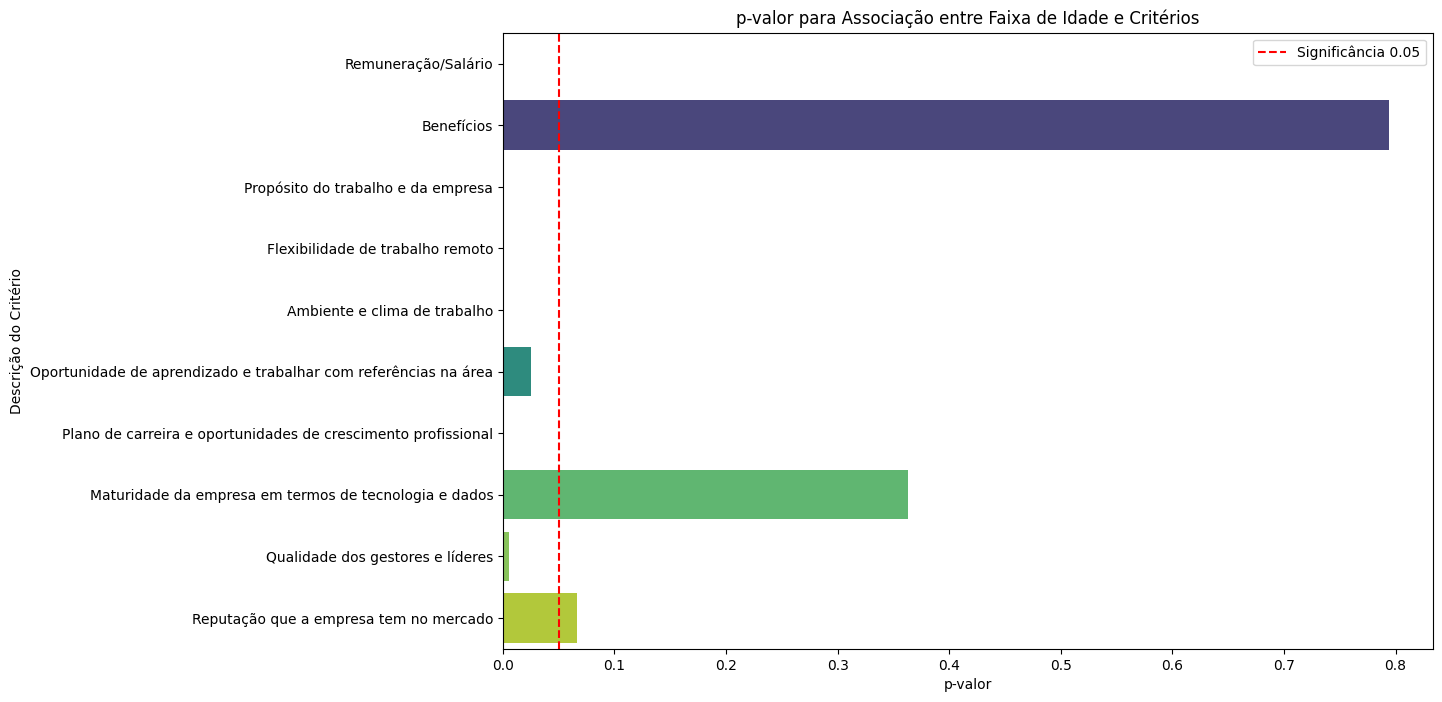

In [63]:
resultados_df['Descrição'] = resultados_df['Critério'].map(dict_cols)

# Plotar o gráfico com as descrições das colunas
plt.figure(figsize=(12, 8))
sns.barplot(data=resultados_df, x='p-valor', y='Descrição', palette='viridis')
plt.axvline(x=0.05, color='red', linestyle='--', label='Significância 0.05')
plt.title('p-valor para Associação entre Faixa de Idade e Critérios')
plt.xlabel('p-valor')
plt.ylabel('Descrição do Critério')
plt.legend()
plt.show()


In [64]:
# Agrupar por faixa de idade e somar os valores dos critérios
frequencias_criterios = df_idade_criterios.groupby('Faixa_Idade').sum()

# Transpor o DataFrame para ter faixas etárias como colunas e critérios como linhas
frequencias_criterios = frequencias_criterios.T

# Adicionar a descrição ao DataFrame de frequências
frequencias_criterios['Descrição'] = frequencias_criterios.index.map(dict_cols)

In [65]:
frequencias_criterios = frequencias_criterios.set_index(frequencias_criterios['Descrição']).drop(columns = 'Descrição')

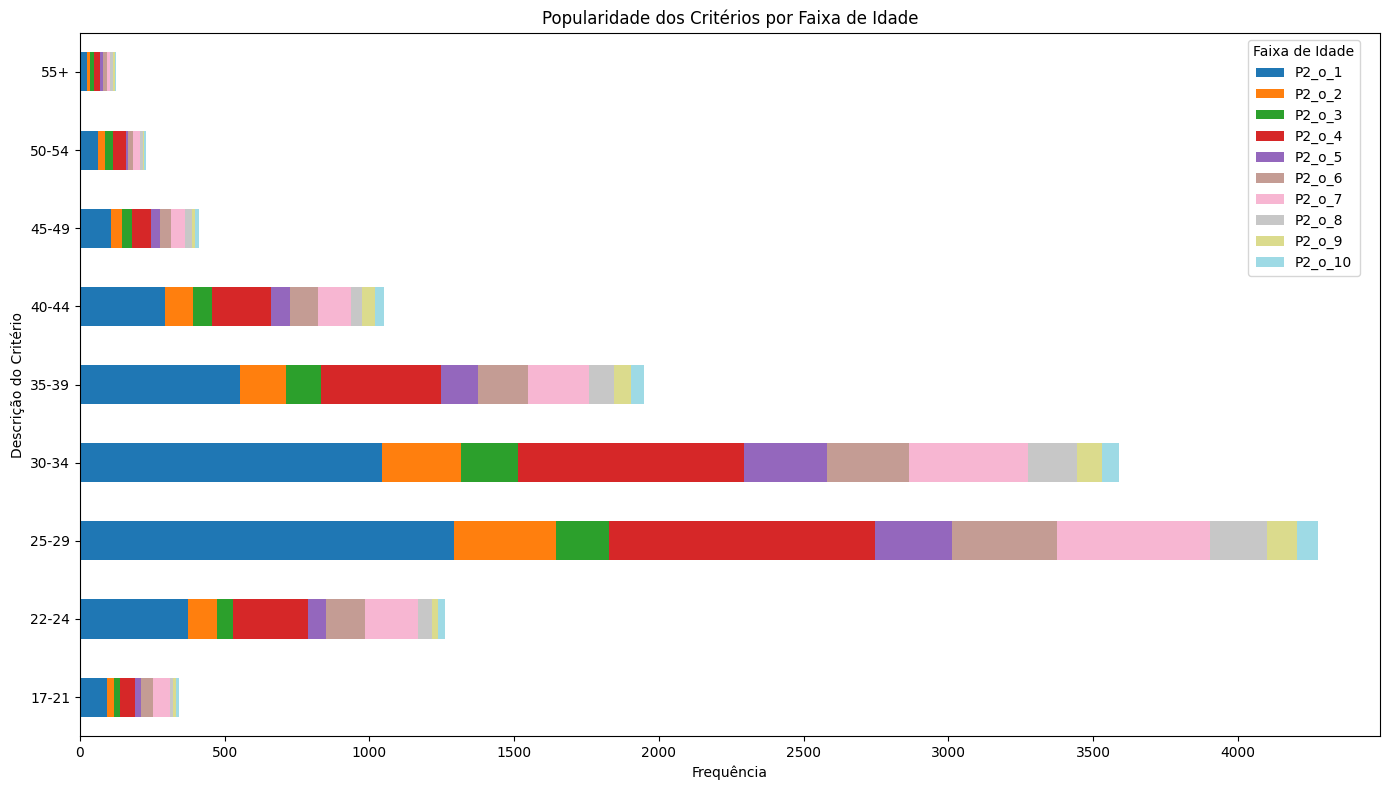

In [88]:
# Transpor o DataFrame para facilitar o gráfico
frequencias_criterios_transposto = frequencias_criterios.T

# Gráfico de barras horizontais empilhadas
ax = frequencias_criterios_transposto.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Popularidade dos Critérios por Faixa de Idade')
plt.xlabel('Frequência')
plt.ylabel('Descrição do Critério')
plt.legend(title='Faixa de Idade', bbox_to_anchor=(0.99, 1), loc='best')
plt.tight_layout()
plt.show()


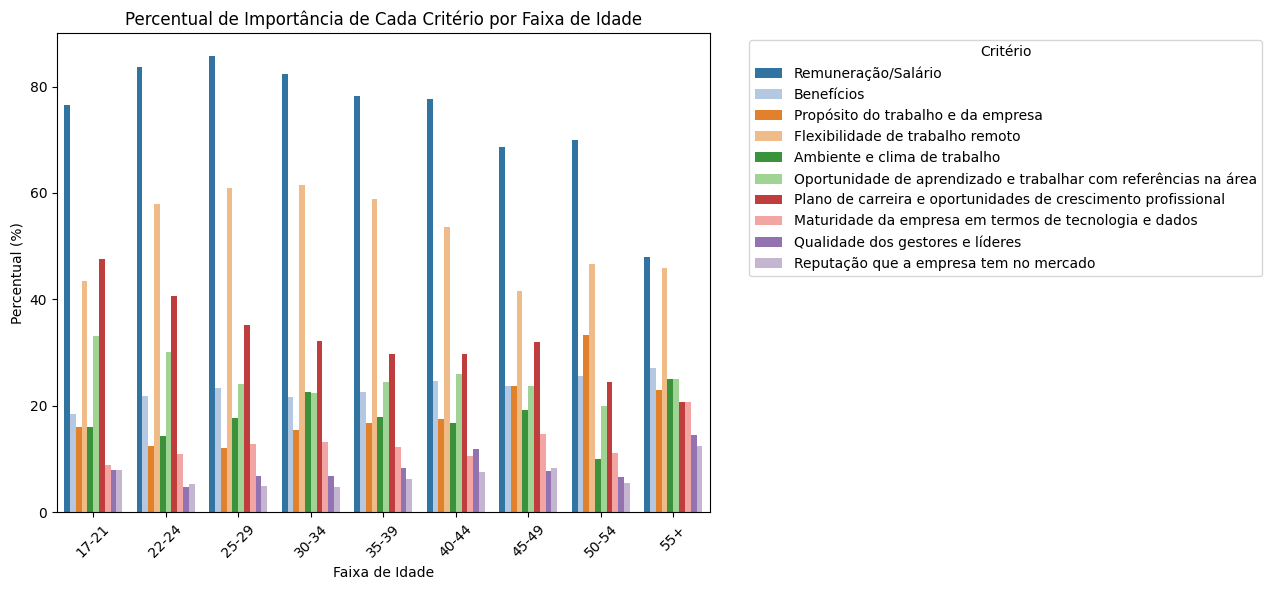

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Contar o total de respostas por faixa de idade
total_por_idade = df_idade_criterios['Faixa_Idade'].value_counts()

# Calcular o percentual de cada critério por faixa de idade
percentuais = pd.DataFrame()
for criterio in criterios:
    criterio_percentual = df_idade_criterios.groupby('Faixa_Idade')[criterio].mean() * 100
    percentuais[dict_cols[criterio]] = criterio_percentual

# Resetar o índice para facilitar a plotagem
percentuais = percentuais.reset_index()
percentuais = percentuais.melt(id_vars='Faixa_Idade', var_name='Critério', value_name='Percentual')

# Usar uma paleta de cores distintas sem repetição
paleta_distinta = sns.color_palette("tab20")

# Plotar gráfico percentual com paleta de cores distintas
plt.figure(figsize=(13, 6))
sns.barplot(data=percentuais, x='Faixa_Idade', y='Percentual', hue='Critério', palette=paleta_distinta)
plt.title('Percentual de Importância de Cada Critério por Faixa de Idade')
plt.xlabel('Faixa de Idade')
plt.ylabel('Percentual (%)')
plt.legend(title='Critério', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

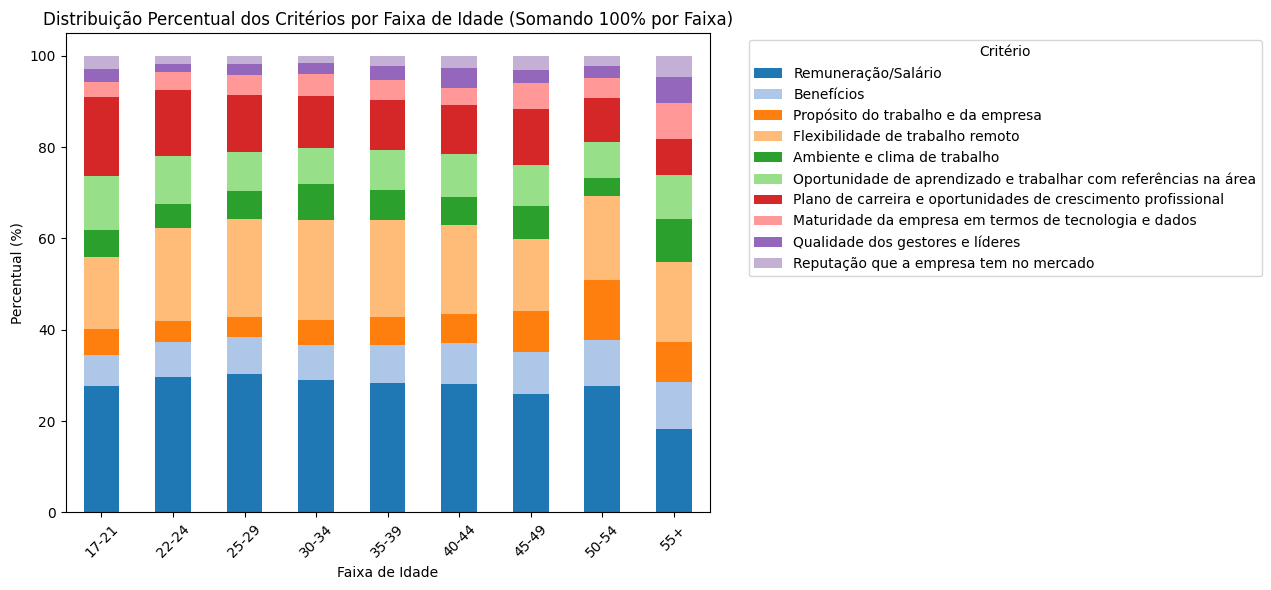

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Contar o total de respostas por faixa de idade
total_por_idade = df_idade_criterios['Faixa_Idade'].value_counts()

# Calcular o percentual de cada critério por faixa de idade
percentuais = pd.DataFrame()
for criterio in criterios:
    criterio_percentual = df_idade_criterios.groupby('Faixa_Idade')[criterio].mean() * 100
    percentuais[dict_cols[criterio]] = criterio_percentual

# Normalizar para que a soma de cada faixa de idade seja 100%
percentuais = percentuais.div(percentuais.sum(axis=1), axis=0) * 100

# Resetar o índice para facilitar a plotagem
percentuais = percentuais.reset_index()

# Usar uma paleta de cores distintas sem repetição
paleta_distinta = sns.color_palette("tab20", n_colors=len(percentuais.columns) - 1)

# Plotar gráfico de barras empilhadas onde cada barra soma 100%
plt.figure(figsize=(14, 8))
percentuais.set_index('Faixa_Idade').plot(kind='bar', stacked=True, color=paleta_distinta, figsize=(13, 6))

plt.title('Distribuição Percentual dos Critérios por Faixa de Idade (Somando 100% por Faixa)')
plt.xlabel('Faixa de Idade')
plt.ylabel('Percentual (%)')
plt.legend(title='Critério', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Verificando a relação entre a faixa de idade e o salário

In [72]:
tabela_contingencia = pd.crosstab(df_p1['Faixa_Idade'], df_p1['P2_h'])
pd.DataFrame(tabela_contingencia)


P2_h,Acima de R$ 40.001/mês,Menos de R$ 1.000/mês,de R$ 1.001/mês a R$ 2.000/mês,de R$ 101/mês a R$ 2.000/mês,de R$ 12.001/mês a R$ 16.000/mês,de R$ 16.001/mês a R$ 20.000/mês,de R$ 2.001/mês a R$ 3.000/mês,de R$ 20.001/mês a R$ 25.000/mês,de R$ 25.001/mês a R$ 30.000/mês,de R$ 3.001/mês a R$ 4.000/mês,de R$ 30.001/mês a R$ 40.000/mês,de R$ 4.001/mês a R$ 6.000/mês,de R$ 6.001/mês a R$ 8.000/mês,de R$ 8.001/mês a R$ 12.000/mês
Faixa_Idade,,,,,,,,,,,,,,
17-21,0,6,43,0,0,0,33,0,0,19,0,14,7,2
22-24,1,8,51,1,12,7,63,0,0,74,1,123,60,47
25-29,10,2,59,0,185,62,93,33,16,124,16,296,254,360
30-34,16,3,36,0,216,109,41,52,38,78,14,171,176,326
35-39,13,9,14,0,120,86,25,41,39,29,23,88,75,151
40-44,19,1,10,0,61,34,17,35,24,13,17,35,38,80
45-49,6,0,0,0,34,13,8,12,5,7,10,10,15,39
50-54,6,1,1,0,18,14,5,12,4,4,1,5,7,13
55+,1,0,1,0,4,3,3,10,2,4,4,3,5,8


In [73]:
from scipy.stats import chi2_contingency

# Realizando o teste Qui-Quadrado
chi2, p, dof, expected = chi2_contingency(tabela_contingencia)

print(f"Estatística Qui-Quadrado: {chi2}")
print(f"p-valor: {p}")


Estatística Qui-Quadrado: 1336.3815212538643
p-valor: 5.274018367604543e-213


In [74]:
import numpy as np

# Número total de observações
n = tabela_contingencia.sum().sum()

# Calculando o coeficiente de Cramer
cramer_v = np.sqrt(chi2 / (n * (min(tabela_contingencia.shape) - 1)))

print(f"Coeficiente de Cramer: {cramer_v}")


Coeficiente de Cramer: 0.18747196446927156
